In [1]:
import numpy as np
import pandas as pd
from typing import Tuple, List, Dict
import time
import matplotlib.pyplot as plt

In [2]:
class State:
    def __init__(self, state=(5, 0)):
        self.state = state
        self.isEnd = False
        self.determine = True
        self._win_states = [(0, 2), (0, 4), (0, 3)]
        self._blocked_states = [(1, 3), (4, 0), (4, 1), (4, 3), (4, 4), (4, 5), (4, 6), (5, 6)]

    def giveReward(self):
        if self.state in self._win_states:
            return 1
        else:
            return 0

    def isEndFunc(self):
        if self.state in self._win_states:
            self.isEnd = True

    def _chooseActionProb(self, action):
        if action == "up":
            return np.random.choice(["up", "left", "right"], p=[0.8, 0.1, 0.1])
        if action == "down":
            return np.random.choice(["down", "left", "right"], p=[0.8, 0.1, 0.1])
        if action == "left":
            return np.random.choice(["left", "up", "down"], p=[0.8, 0.1, 0.1])
        if action == "right":
            return np.random.choice(["right", "up", "down"], p=[0.8, 0.1, 0.1])

    def nxtPosition(self, action):

        if self.determine:
            if action == "up":
                nxtState = (self.state[0] - 1, self.state[1])
            elif action == "down":
                nxtState = (self.state[0] + 1, self.state[1])
            elif action == "left":
                nxtState = (self.state[0], self.state[1] - 1)
            else:
                nxtState = (self.state[0], self.state[1] + 1)
            self.determine = False
        else:
            action = self._chooseActionProb(action)
            self.determine = True
            nxtState = self.nxtPosition(action)
        
        if (nxtState[0] >= 0) and (nxtState[0] <= 5):
            if (nxtState[1] >= 0) and (nxtState[1] <= 6):
                if nxtState not in self._blocked_states:
                    return nxtState
        
        return self.state

In [3]:
class Agent:
    def __init__(self, lr = 0.3, exp_rate = 0.3, decay_gamma = 0.8):
        self.states = []
        self.actions = ["up", "down", "left", "right"]
        self.state = State()
        self.isEndFunc = self.state.isEndFunc
        self.lr = lr
        self.exp_rate = exp_rate
        self.decay_gamma = decay_gamma
        self.report = list()
        self.with_object = False

        self.Q_values = {}
        for i in range(6):
            for j in range(7):
                self.Q_values[(i, j)] = {}
                for m in self.actions:
                    self.Q_values[(i, j)][m] = (0, False)

    def choose_action(self):
        max_reward: int = 0
        action: str = ""

        if np.random.uniform(0, 1) <= self.exp_rate:
            action = np.random.choice(self.actions)
        else:
            for m in self.actions:
                state_now = self.state.state
                next_reward = self.Q_values[state_now][m][0]
                if next_reward >= max_reward:
                    action = m
                    max_reward = next_reward
        return action

    def do_action(self, action):
        state = self.state.nxtPosition(action)
        return State(state=state)

    def reset(self):
        self.states = []
        self.state = State()
        self.isEndFunc = self.state.isEndFunc
        self.with_object = False
        
    def get_report_execution(self):
        return self._report
    
    def propagate_reward(self):
        reward = self.state.giveReward()
        for m in self.actions:
            self.Q_values[self.state.state][m] = (reward, self.with_object)
        for state in reversed(self.states):
            Q_value_now = self.Q_values[state[0]][state[1]][0]
            reward = Q_value_now + self.lr * (self.decay_gamma * reward - Q_value_now)
            self.Q_values[state[0]][state[1]] = (reward, self.with_object)
        self.reset()
        
    def get_object(self, action):
        if ((self.state.state == (2, 2) and action == 'right') or (self.state.state == (2, 4) and action == 'left')) and not self.with_object:
            self.with_object = True
                
    def play(self, rounds=10):
        round = 0
        steps = 0
        self.with_object = False
        start = time.time()
        while round < rounds:
            if self.with_object and self.state.isEnd:
                self.propagate_reward()
                report = {'round': round, 'steps': steps}
                print(report)
                self.report.append(report)
                steps = 0
                round += 1
            else:
                action = self.choose_action()
                self.states.append([(self.state.state), action])
                self.get_object(action)
                msg = f"Posição atual em {self.state.state}, action para {action}, agarrou objeto: {self.with_object},"
                self.state = self.do_action(action)
                self.state.isEndFunc()
                
                #print(f"{msg} próxima posição em {self.state.state}.")
                self.isEndFunc = self.state.isEnd
                steps += 1
        end = time.time()

        print('Processing time:', int(end-start), 'segundos')

{'round': 0, 'steps': 2090}
{'round': 1, 'steps': 297}
{'round': 2, 'steps': 3571}
{'round': 3, 'steps': 731}
{'round': 4, 'steps': 188}
{'round': 5, 'steps': 78}
{'round': 6, 'steps': 59}
{'round': 7, 'steps': 14}
{'round': 8, 'steps': 59}
{'round': 9, 'steps': 18}
{'round': 10, 'steps': 37}
{'round': 11, 'steps': 59}
{'round': 12, 'steps': 29}
{'round': 13, 'steps': 44}
{'round': 14, 'steps': 107}
{'round': 15, 'steps': 38}
{'round': 16, 'steps': 12}
{'round': 17, 'steps': 205}
{'round': 18, 'steps': 166}
{'round': 19, 'steps': 26}
{'round': 20, 'steps': 17}
{'round': 21, 'steps': 278}
{'round': 22, 'steps': 254}
{'round': 23, 'steps': 83}
{'round': 24, 'steps': 141}
{'round': 25, 'steps': 34}
{'round': 26, 'steps': 49}
{'round': 27, 'steps': 1771}
{'round': 28, 'steps': 748}
{'round': 29, 'steps': 403}
{'round': 30, 'steps': 71}
{'round': 31, 'steps': 53}
{'round': 32, 'steps': 457}
{'round': 33, 'steps': 51}
{'round': 34, 'steps': 35}
{'round': 35, 'steps': 186}
{'round': 36, 'step

Text(0.5, 0, 'Rounds')

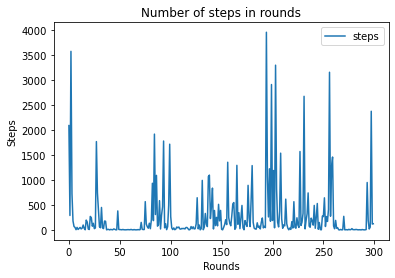

In [4]:
agent = Agent(lr=0.3, exp_rate=0.3, decay_gamma=0.8)

agent.play(300)

df_report = pd.DataFrame(agent.report)
print('Max steps:', df_report.steps.max())
print('Min steps:', df_report.steps.min())

ax = df_report.set_index('round').plot()
ax.set_title('Number of steps in rounds')
ax.set_ylabel("Steps")
ax.set_xlabel('Rounds')

Apresente a modelagem de estados considerada, bem como a quantidade de estados presentes no MDP. Inclua na contagem os estados não-válidos:

- Pegou o objeto
- Lugar do agente
- Lugar do objeto

Apresente a modelagem das ações que o agente pode executar
- Subir
- Descer
- Direita
- Esquerda
- Ficar no mesmo lugar

Apresente a modelagem da função de recompensa, com as situações em que o agente é recompensado bem como a magnitude da recompensa.
    
- Chegar no objeto
- Chega com objeto na base

Apresente as configurações do horizonte de aprendizagem, que é representado pela quantidade máxima de passos de tempo por episódios, quantidade máxima de episódios, e política de exploração ao longo do tempo;

- learning rate = 0.3
- exp_rate = 0.3
- decay_gamma = 0.8
- steps = 300